<a href="https://colab.research.google.com/github/AlcirCastro/Inteligencia-Artificial-2o-Trabalho-Experimento-de-Aprendizado-Nao-Supervisionado/blob/main/Trabalho2_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
!pip install minisom

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from pylab import bone, pcolor, colorbar, plot, show
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor

In [39]:
df = pd.read_excel("StartUpsESG_0602.xlsx")

In [40]:
df.head()

,id,StartUp,Country,Year,ESG,E,S,G,Raised,distr_tk,...,FISCALFRD,FINACIFRD,FOREIGINVEST,FOREIGDP,INTERPAY,percmath,GINI,MAKTEFF,PERCTECH,DEVCOUNT
0,12316,VenusEnergy,Lithuania,2018,0.010,0.008,0.002,0.000,5986183.0,0.27,...,96.7,70,1.299842e+09,2.420713,3.476571,4.26941,35.7,4.642995,3.11263,1
1,23416,GreenEnergyCoin,Netherlands,2018,0.018,0.010,0.006,0.002,0.0,0.00,...,88.2,80,-3.614670e+11,-39.565294,2.264509,6.37706,28.1,5.408080,2.82506,1
2,1553,HydroMiner,Austria,2017,0.014,0.010,0.000,0.004,3500000.0,0.00,...,81.1,70,-2.855524e+10,-6.277635,3.644302,6.07867,30.8,4.897589,4.38647,1
3,17028,PowerCorp,"Hong Kong SAR, China",2018,0.008,0.006,0.000,0.002,0.0,0.00,...,100.0,90,9.703626e+10,26.828457,0.050000,0.00000,0.0,5.705542,0.00000,1
4,8483,Emyron Coin,United States,2018,0.017,0.000,0.011,0.006,0.0,0.28,...,54.8,80,2.614820e+11,1.268600,11.816379,7.20920,41.4,5.209139,3.78213,1


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6541 entries, 0 to 6540
Data columns (total 53 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   6541 non-null   int64  
 1   StartUp              6541 non-null   object 
 2   Country              6541 non-null   object 
 3   Year                 6541 non-null   int64  
 4   ESG                  6541 non-null   float64
 5   E                    6541 non-null   float64
 6   S                    6541 non-null   float64
 7   G                    6541 non-null   float64
 8   Raised               6541 non-null   float64
 9   distr_tk             6541 non-null   float64
 10  Rating               6541 non-null   float64
 11   platform ETHEREUM   6541 non-null   int64  
 12   kyc                 6541 non-null   int64  
 13   whitelist           6541 non-null   int64  
 14   mvp                 6541 non-null   int64  
 15   teamsize            6541 non-null   i

In [42]:
# Definir os países para cada continente em inglês
africa = ["Egypt, Arab Rep.","South Africa", "Egypt", "Mali", "Sierra Leone", "Angola", "Eritrea", "Morocco", "Seychelles", "Algeria", "Ethiopia", "Mauritius", "Tunisia", "Benin", "Gabon", "Mauritania", "Somalia", "Botswana", "Gambia", "Mozambique", "Swaziland", "Burkina Faso", "Ghana", "Namibia", "Sudan", "Burundi", "Guinea", "Niger", "South Sudan", "Cape Verde", "Guinea-Bissau", "Nigeria", "Uganda", "Cameroon", "Equatorial Guinea", "Kenya", "Tanzania", "Chad", "Lesotho", "Central African Republic", "Togo", "Comoros", "Liberia", "Democratic Republic of the Congo", "Zambia", "Congo", "Libya", "Rwanda", "Zimbabwe", "Ivory Coast", "Madagascar", "São Tomé and Príncipe", "Djibouti", "Malawi", "Senegal"]

america = ["St. Lucia","Bahamas, The","St. Vincent and the Grenadines","St. Kitts and Nevis","Venezuela, RB","British Virgin Islands","Cayman Islands","Antigua and Barbuda", "Colombia", "Guyana", "Dominican Republic", "Argentina", "Costa Rica", "Haiti", "Saint Lucia", "Bahamas", "Cuba", "Honduras", "Saint Kitts and Nevis", "Barbados", "Dominica", "Jamaica", "Saint Vincent and the Grenadines", "Belize", "El Salvador", "Mexico", "Suriname", "Bolivia", "Ecuador", "Nicaragua", "Trinidad and Tobago", "Brazil", "United States", "Panama", "Uruguay", "Canada", "Grenada", "Paraguay", "Venezuela", "Chile", "Guatemala", "Peru"]

asia = ["Lao PDR","Syrian Arab Republic","Taiwan","Hong Kong SAR, China","Afghanistan", "North Korea", "Jordan", "Kyrgyzstan", "Saudi Arabia", "Korea, Rep.", "Kuwait", "Syria", "Bangladesh", "United Arab Emirates", "Laos", "Sri Lanka", "Bahrain", "Philippines", "Lebanon", "Tajikistan", "Brunei", "Yemen", "Malaysia", "Thailand", "Bhutan", "India", "Maldives", "Timor-Leste", "Cambodia", "Indonesia", "Myanmar", "Turkey", "Qatar", "Iran", "Mongolia", "Turkmenistan", "Kazakhstan", "Iraq", "Nepal", "Uzbekistan", "China", "Israel", "Oman", "Vietnam", "Singapore", "Japan", "Pakistan", "Kyrgyzstan","india"]

europa = ["North Macedonia","Slovak Republic","Albania", "Denmark", "Italy", "Poland", "Germany", "Slovakia", "Latvia", "Portugal", "Andorra", "Slovenia", "Liechtenstein", "United Kingdom", "Armenia", "Spain", "Lithuania", "Czech Republic", "Austria", "Estonia", "Luxembourg", "Romania", "Azerbaijan", "Finland", "Macedonia", "Russian Federation", "Belarus", "France", "Malta", "San Marino", "Belgium", "Georgia", "Moldova", "Serbia", "Bosnia and Herzegovina", "Greece", "Monaco", "Sweden", "Bulgaria", "Hungary", "Montenegro", "Switzerland", "Cyprus", "Ireland", "Norway", "Ukraine", "Croatia", "Iceland", "Netherlands","Gibraltar"]

oceania = ["Australia", "Kiribati", "Palau", "Tuvalu", "Fiji", "Micronesia", "Papua New Guinea", "Vanuatu", "Marshall Islands", "Nauru", "Samoa", "Solomon Islands", "New Zealand", "Tonga"]

# Criar um DataFrame com os países e seus respectivos continentes
paises = africa + america + asia + europa + oceania
continentes = (['Africa'] * len(africa)) + (['America'] * len(america)) + (['Asia'] * len(asia)) + (['Europe'] * len(europa)) + (['Oceania'] * len(oceania))


id_continentes = {'Africa': 0, 'America': 1, 'Asia': 2, 'Europe': 3, 'Oceania': 4}
df_paises = pd.DataFrame({'Country': paises, 'Continent': continentes})
df_paises['Continent_ID'] = df_paises['Continent'].map(id_continentes)

print(df_paises)


              Country Continent  Continent_ID
0    Egypt, Arab Rep.    Africa             0
1        South Africa    Africa             0
2               Egypt    Africa             0
3                Mali    Africa             0
4        Sierra Leone    Africa             0
..                ...       ...           ...
205             Nauru   Oceania             4
206             Samoa   Oceania             4
207   Solomon Islands   Oceania             4
208       New Zealand   Oceania             4
209             Tonga   Oceania             4

[210 rows x 3 columns]


In [43]:
for index, pais in enumerate(df["Country"]):
    # Verificar se o país existe no DataFrame df_paises
    if pais in df_paises['Country'].values or str(df_paises['Country'].values) in pais:
        # Encontrar o índice do país no DataFrame df_paises
        idx = df_paises[df_paises['Country'] == pais].index[0]
        # Atribuir o ID do continente correspondente ao país no DataFrame df2
        df.at[index, 'idContinente'] = df_paises.at[idx, 'Continent_ID']
    else:
        # Se o país não existe em df_paises, atribuir o valor 5
        df.at[index, 'idContinente'] = 5

MINISOM

In [77]:
df2 = df[["Raised","ESG","E","S","G","Country"]]
df2.describe()

,Raised,ESG,E,S,G
count,6.541000e+03,6541.000000,6541.000000,6541.000000,6541.000000
mean,4.091069e+06,0.000894,0.000168,0.000471,0.000310
std,2.182035e+07,0.002945,0.001605,0.001987,0.001353
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,1.116000e+06,0.000000,0.000000,0.000000,0.000000
max,1.000000e+09,0.060000,0.080000,0.060000,0.060000


In [89]:
media_esg = df2.groupby("Country")["ESG"].mean()
for index, row in df2.iterrows():
    if row['ESG'] == 0:
        df2.at[index, 'ESG'] = media_esg[row['Country']]


media_e = df2.groupby("Country")["E"].mean()
for index1, row in df2.iterrows():
    if row['E'] == 0:
        df2.at[index1, 'E'] = media_e[row['Country']]


media_s = df2.groupby("Country")["S"].mean()
for index2, row in df2.iterrows():
    if row['S'] == 0:
        df2.at[index2, 'S'] = media_s[row['Country']]


media_g = df2.groupby("Country")["G"].mean()
for index3, row in df2.iterrows():
    if row['G'] == 0:
        df2.at[index3, 'G'] = media_g[row['Country']]

df2.describe()

,Raised,ESG,E,S,G
count,6.541000e+03,6541.000000,6541.000000,6541.000000,6541.000000
mean,4.091069e+06,0.001649,0.000329,0.000884,0.000585
std,2.182035e+07,0.002742,0.001598,0.001902,0.001301
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000802,0.000084,0.000396,0.000240
50%,0.000000e+00,0.000871,0.000148,0.000464,0.000297
75%,1.116000e+06,0.001099,0.000193,0.000508,0.000346
max,1.000000e+09,0.060000,0.080000,0.060000,0.060000


In [90]:
data = df2
data = data.drop("Country",axis=1)
#data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

sc = MinMaxScaler(feature_range = (0,1))
sc.fit(data)
data=sc.transform(data)

#data = data.values

# Initialization and training
som_shape = (2, 2)
som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=1, learning_rate=.5,
              neighborhood_function='gaussian', activation_distance = 'euclidean', topology = 'rectangular',random_seed=10)
som.pca_weights_init(data)
som.train_batch(data, 1000, verbose=True)

/usr/local/lib/python3.10/dist-packages/minisom.py:388: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + \


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.016059291176065527


In [91]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in data]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

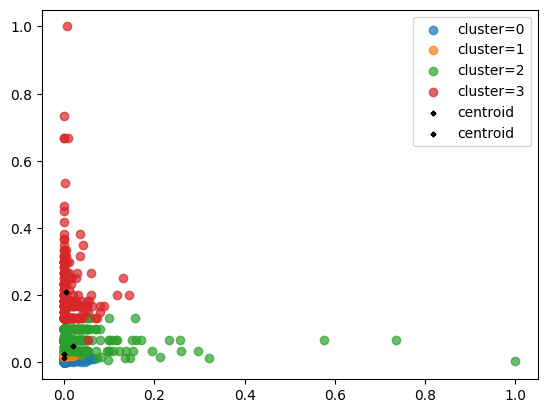

In [92]:
%matplotlib inline
#plt.xlim(0, 0.5)
#plt.ylim(0, 1)
# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index == c, 0],
                data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x',
                s=5, linewidths=3, color='k', label='centroid')
plt.legend();